In [1]:
import tweepy
import csv

consumer_key = "TRmrHCS7HvXTwAQ3xCeun7E13"
consumer_secret = "sJGOALBYhW5iqzT3pzBWHdnHXJqtcabsweQetFd3mZOPeAbFgm"
access_key = "2150819399-0K6BIlyfdJNfhcQKBmMQz7T52WBUWaLDlfi17Ml"
access_secret = "idh0Dqj4J4fK5tQ6yYDq7okuS1nOjrnRiAWiNLPXyzq0B"


In [6]:
import nltk
from nltk.metrics import recall as recall
from nltk.metrics import precision as precision
from nltk.metrics import f_measure as f_measure
from nltk.corpus import stopwords
import collections
from nltk.classify import SklearnClassifier
from sklearn.svm import LinearSVC

In [3]:
#nltk.download('stopwords')

In [7]:
from string import punctuation

In [8]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    alltweets = []

    new_tweets = api.user_timeline(screen_name=screen_name, count=200)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    c = 5

    while c > 0:
        # print("getting tweets before %s" % (oldest))
        new_tweets = api.user_timeline(screen_name = screen_name, count = 200, max_id = oldest)

        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))
        c -= 1

    outtweets = [[tweet.text.encode("utf-8")] for tweet in alltweets]
   # write the csv inside particular folder

    with open('%s_tweets.csv' % screen_name, 'w') as f:
       writer = csv.writer(f)
       writer.writerows(outtweets)

In [9]:
def clean_data(filename):
    file = open(filename, 'rt')
    text = file.read()
    file.close()

    # split into words by white space
    words = text.split("\n")
    words = [word.lower() for word in words]
    print(words[:1])

    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    print(stripped[:1])

    # create cleaned file
    file = open("cleaned_"+filename, "w")
    for i in stripped:
        file.write(i+"\n")
    file.close()

In [10]:
def word_split(data):
    data_new = []
    for word in data:
        word_filter = [i.lower() for i in word.split()]
        data_new.append(word_filter)
    return data_new

def word_feats(words):
    return dict([(word, True) for word in words])

stopset = set(stopwords.words('english'))

def stopword_filtered_word_feats(words):
    return dict([(word, True) for word in words if word not in stopset])

In [11]:
posdata = []
negdata = []
with open('positive-data.csv', 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for col in reader:
        posdata.append(col[0])
with open('negative-data.csv', 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for col in reader:
        negdata.append(col[0])

In [12]:
negfeats = [(stopword_filtered_word_feats(f), 'neg') for f in word_split(negdata)]
posfeats = [(stopword_filtered_word_feats(f), 'pos') for f in word_split(posdata)]

In [13]:
negcutoff = int(len(negfeats)*10/11)
poscutoff = int(len(posfeats)*10/11)

In [14]:
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]

In [15]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [16]:
classifier = nltk.NaiveBayesClassifier.train(trainfeats)
for i, (feats, label) in enumerate(testfeats):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy = nltk.classify.util.accuracy(classifier, testfeats)*100
pos_precision = nltk.precision(refsets['pos'], testsets['pos'])

In [17]:
screen_list = ["india","china","usa","canada","russia","france"]

In [18]:
for i in range(len(screen_list)):
    get_all_tweets(screen_list[i])

...199 tweets downloaded so far
...296 tweets downloaded so far
...296 tweets downloaded so far
...296 tweets downloaded so far
...296 tweets downloaded so far
...296 tweets downloaded so far
...200 tweets downloaded so far
...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...200 tweets downloaded so far
...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...200 tweets downloaded so far
...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...200 tweets downloaded so far
...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...200 tweets downloaded so far


In [19]:
for i in screen_list:
    clean_data(i+'_tweets.csv')

["b'@doc_comofficial @ddocasoul good job\\xf0\\x9f\\x92\\xaa\\xf0\\x9f\\x92\\xaa\\xf0\\x9f\\x92\\xaa'"]
['bdoccomofficial ddocasoul good jobxf0x9fx92xaaxf0x9fx92xaaxf0x9fx92xaa']
["b'apple\\xe2\\x80\\x99s homepod will be available in china starting early next year https://t.co/rxupm8ek8g by @catherineshu https://t.co/9keywdnsig'"]
['bapplexe2x80x99s homepod will be available in china starting early next year httpstcorxupm8ek8g by catherineshu httpstco9keywdnsig']
["b'your drive home in washington \\xf0\\x9f\\x98\\x8d https://t.co/z6f9le4162'"]
['byour drive home in washington xf0x9fx98x8d httpstcoz6f9le4162']
["b'\\xe2\\x80\\x9cwhere stars past the spruce copse mingle with fireflies\\nor the dayscape flings a thousand tones of light back at t\\xe2\\x80\\xa6 https://t.co/h1qw4zv4k6'"]
['bxe2x80x9cwhere stars past the spruce copse mingle with firefliesnor the dayscape flings a thousand tones of light back at txe2x80xa6 httpstcoh1qw4zv4k6']
['"b\'rt @novgorodrus: from 6 to 7 july 2019 in 

In [20]:
#implementation

In [21]:
p = []
n = []
for i in screen_list:
    my_data = []
    error = 0
    with open('cleaned_'+i+'_tweets.csv', 'r') as myfile:
        reader = csv.reader(myfile, delimiter=',')
        for col in reader:
            try:
                my_data.append(col[0])
            except:
                error+=1
    print("Total: ", len(my_data))
    print("Errors:", error)
    print("Sucess", len(my_data)- error)
    
    result = collections.defaultdict(set)
    my_data_feats = [(stopword_filtered_word_feats(f), 'pos') for f in word_split(my_data)]
    for i, (feats, label) in enumerate(my_data_feats):
        observed = classifier.classify(feats)
        result[observed].add(i)
    p.append(len(result['pos']))
    n.append(len(result['neg']))

Total:  296
Errors: 297
Sucess -1
Total:  1200
Errors: 1201
Sucess -1
Total:  1200
Errors: 1201
Sucess -1
Total:  1200
Errors: 1201
Sucess -1
Total:  1200
Errors: 1201
Sucess -1
Total:  1200
Errors: 1201
Sucess -1


In [22]:
for i in p:
    print(i)

141
335
675
470
559
683


In [23]:
for i in n:
    print(i)

155
865
525
730
641
517


In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
for i in range(len(screen_list)):
    plt.subplot(2,3,i+1)
    plt.bar(['pos','neg'],[p[i],n[i]],color = ['g','r'])
    plt.title('tweets for screen name : '+screen_list[i])
    plt.ylabel('number of tweets')
plt.show()

<Figure size 1200x800 with 6 Axes>

In [25]:
G_pos = []
for i in p:
    G_pos.append(i)
G_pos

[141, 335, 675, 470, 559, 683]

In [26]:
G_neg = []
for i in n:
    G_neg.append(i)
G_neg

[155, 865, 525, 730, 641, 517]

In [27]:
GT_pos = sum(G_pos)
GP_pos = [i/GT_pos for i in G_pos]
GP_pos

[0.04924903946908837,
 0.11701012923506811,
 0.2357666783094656,
 0.16416346489696124,
 0.1952497380370241,
 0.23856095005239258]

In [28]:
GT_neg = sum(G_neg)
GP_neg = [i/GT_neg for i in G_neg]
GP_neg

[0.04515001456452083,
 0.25196621031168076,
 0.1529274686862802,
 0.21264200407806583,
 0.1867171570055345,
 0.15059714535391786]

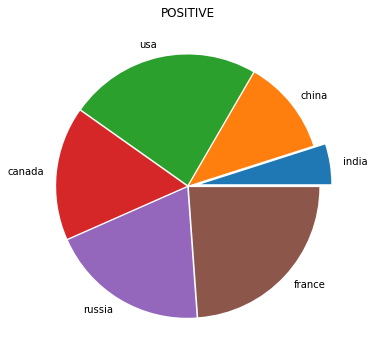

In [29]:
plt.figure(1,figsize=(6,6))
plt.pie(GP_pos,labels=screen_list, explode=[0.1,0.01,0.01,0.01,0.01,0.01])
plt.title('POSITIVE')
plt.show()

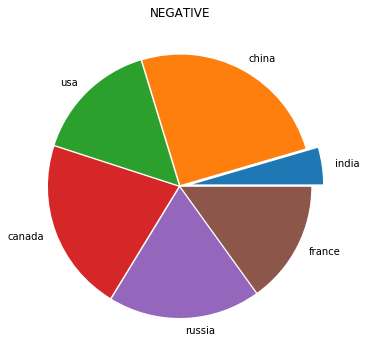

In [30]:
plt.figure(1,figsize=(6,6))
plt.pie(GP_neg,labels=screen_list, explode=[0.1,0.01,0.01,0.01,0.01,0.01])
plt.title('NEGATIVE')
plt.show()

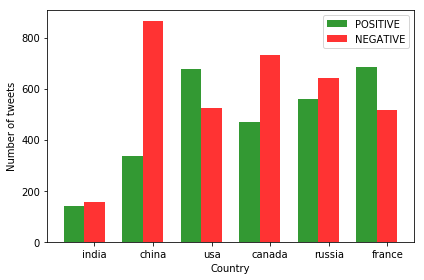

In [32]:
import numpy as np
n_groups = 6
 
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='g',
                 label='POSITIVE')
 
rects2 = plt.bar(index + bar_width, n, bar_width,
                 alpha=opacity,
                 color='r',
                 label='NEGATIVE')
plt.xlabel('Country')
plt.ylabel('Number of tweets')
plt.xticks(index + bar_width, screen_list)
plt.legend()
 
plt.tight_layout()
plt.show()